In [ ]:
import json
import numpy as np
import pandas as pd
import requests #untuk ambil data via API


# Membuat Fungsi get API

Buat fungsi python get_json dengan parameter api_url. fungsi ini akan mengembalikan value berupa python dictionary jika status_code yang dihasilkan adalah 200. Jika tidak, maka value yang dikembalikan adalah None.

In [ ]:
def get_json(api_url):
	response = requests.get(api_url)
	if response.status_code == 200:
		return json.loads(response.content.decode('utf-8'))
	else:
		return None


# Memanggil API Covid19

Rekapitulasi data COVID-19 global berada di https://covid19-api.org/. Gunakan parameter record_date untuk mengambil data covid19 di seluruh negara pada tanggal tertentu. Untuk kasus ini, gunakan record_date '2020-08-17', dan masukkan hasil respon api ke variable df_covid_worldwide.

Untuk mendapatkan dataframe covid19, gunakan fungsi pd.io.json.json_normalize dan panggil function yang sudah dibuat sebelumnya, yaitu get_json() Print sample data covid dengan menggunakan head() function.

In [ ]:
record_date = '2020-08-17'
covid_url = 'https://covid19-api.org/api/status?date='+ record_date
df_covid_worldwide = pd.json_normalize(get_json(covid_url))

df_covid_worldwide.head()

,country,last_update,cases,deaths,recovered
0,US,2020-08-16T23:27:50,5401167,170019,1833067
1,BR,2020-08-16T23:27:50,3340197,107852,2655017
2,IN,2020-08-16T23:27:50,2589682,49980,1862258
3,RU,2020-08-16T23:27:50,920719,15653,731444
4,ZA,2020-08-16T23:27:50,587345,11839,472377


# Merubah Format date

Ubah format kolom 'last_update' menggunakan fungsi to_datetime dengan format YYYY-mm-dd HH:MM:SS. Lalu ubah bentuk datetime ke bentuk date dengan fungsi date() melalui fungsi lambda untuk mengubah setiap row-nya.

In [ ]:
df_covid_worldwide['last_update'] = pd.to_datetime(df_covid_worldwide['last_update'], format='%Y-%m-%d %H:%M:%S')
df_covid_worldwide['last_update'] = df_covid_worldwide['last_update'].apply(lambda x: x.date()) #ubah datetime ke bentuk date tiap rownya
df_covid_worldwide[['last_update']]

,last_update
0,2020-08-16
1,2020-08-16
2,2020-08-16
3,2020-08-16
4,2020-08-16
...,...
201,2020-03-17
202,2020-03-19
203,2020-03-18
204,2020-03-17



# Mengambil Data Countries

Buatlah dataframe countries dengan memanggil variable countries_url ke api https://covid19-api.org/api/countries. Lalu ubah nama kolom alpha2 menjadi country, kemudian ambil hanya kolom name dan country saja untuk dataframe countries (df_countries) ini.

Akhirnya cetaklah lima data teratas dari dataframe countries (df_countries).

In [ ]:
countries_url = 'https://covid19-api.org/api/countries'
df_countries = pd.json_normalize(get_json(countries_url))
df_countries = df_countries.rename(columns={'alpha2': 'country'})[['name','country']] #rename dan ambil kolom name dan country saja

df_countries.head()

,name,country
0,Afghanistan,AF
1,Albania,AL
2,Algeria,DZ
3,Andorra,AD
4,Angola,AO


# Merge Covid19 Data dan Countries

Selanjutnya adalah mapping data covid19 dan data country. Gunakan fungsi merge pada pandas untuk menggabungkan df_covid_worldwide dan df_countries. Untuk merge, gunakan kolom country. Lalu print sample data dengan menggunakan head().

In [ ]:
df_covid_denormalized = pd.merge(df_covid_worldwide, df_countries, on = 'country') #merge 2 dataframe berdasarkan country

df_covid_denormalized.head()

,country,last_update,cases,deaths,recovered,name
0,US,2020-08-16,5401167,170019,1833067,United States of America
1,BR,2020-08-16,3340197,107852,2655017,Brazil
2,IN,2020-08-16,2589682,49980,1862258,India
3,RU,2020-08-16,920719,15653,731444,Russian Federation
4,ZA,2020-08-16,587345,11839,472377,South Africa


# Menghitung Fatality Ratio

Tambahkan satu kolom tambahan yaitu fatality_ratio, yang merupakan pembagian antara kolom deaths dan cases.

In [ ]:
df_covid_denormalized['fatality_ratio'] = df_covid_denormalized['deaths']/df_covid_denormalized['cases']
df_covid_denormalized.head()

,country,last_update,cases,deaths,recovered,name,fatality_ratio
0,US,2020-08-16,5401167,170019,1833067,United States of America,0.031478
1,BR,2020-08-16,3340197,107852,2655017,Brazil,0.032289
2,IN,2020-08-16,2589682,49980,1862258,India,0.019300
3,RU,2020-08-16,920719,15653,731444,Russian Federation,0.017001
4,ZA,2020-08-16,587345,11839,472377,South Africa,0.020157


# Negara-negara dengan Fatality Ratio Tertinggi

Ambil top 20 negara dengan value kolom fatality_ratio tertinggi dengan menggunakan fungsi sort_values.

In [ ]:
df_top_20_fatality_rate = df_covid_denormalized.sort_values(by='fatality_ratio', ascending=False).head(20)
df_top_20_fatality_rate

,country,last_update,cases,deaths,recovered,name,fatality_ratio
134,YE,2020-08-16,1869,530,1013,Yemen,0.283574
11,GB,2020-08-16,320343,46791,1486,United Kingdom of Great Britain and Northern I...,0.146065
16,IT,2020-08-16,253915,35396,203786,Italy,0.139401
36,BE,2020-08-16,77869,9935,17981,Belgium,0.127586
105,HU,2020-08-16,4916,608,3623,Hungary,0.123678
17,FR,2020-08-16,252965,30410,83993,France,0.120214
6,MX,2020-08-16,517714,56543,418164,Mexico,0.109217
191,EH,2020-08-16,10,1,8,Western Sahara,0.100000
40,NL,2020-08-16,64451,6194,345,Netherlands,0.096104
10,ES,2020-08-16,342813,28617,150376,Spain,0.083477


# Visualisasi Negara dengan Fatality Ratio Tertinggi

Untuk memvisualisasikan negara-negara dengan kasus fatality rate tertinggi akibat covid-19 ini dapat dilakukan dengan menggunakan bar chart.  Di sini tentukan terlebih dahulu isi dari variable x axis dan y axis.

Variabel x axis adalah kolom name, dan kolom y atau value nya adalah kolom fatality_ratio dan gunakan fungsi plt.bar([value x axis, value y axis]).

Label sumbu x diputar 90 derajat untuk menghindari bertumpuknya nama-nama negara pada posisi 0 derajat.

In [ ]:
import matplotlib.pyplot as plt
plt.style.use('ggplot')

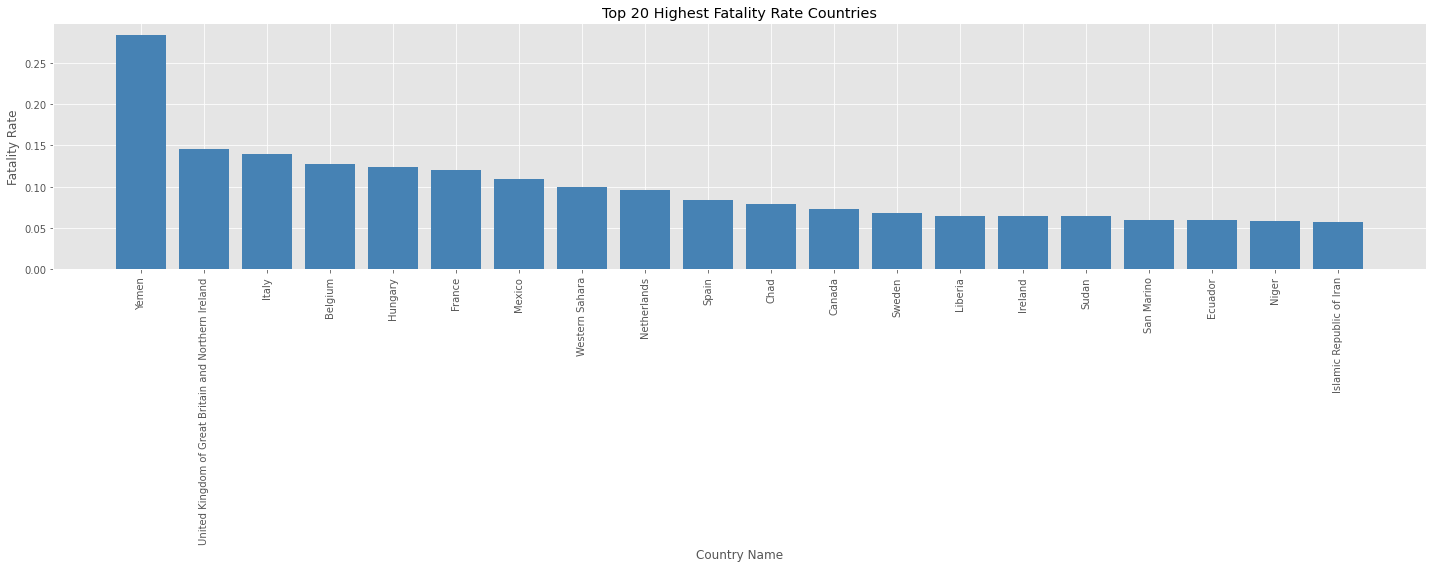

In [ ]:
plt.figure(figsize=(20, 8))
x = df_top_20_fatality_rate['name']
y = df_top_20_fatality_rate['fatality_ratio']
plt.bar(x,y, color = 'steelblue')
plt.xlabel('Country Name')
plt.ylabel('Fatality Rate')
plt.title('Top 20 Highest Fatality Rate Countries')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

# Menggabungkan Dataframe Negara Tetangga Indonesia

Selanjutnya adalah membandingkan kasus covid19 di Indonesia (ID) dengan negara-negara tetangga, yaitu:

    MY -> Malaysia,
    SG -> Singapure,
    TH -> Thailand,
    VN -> Vietnam.

Untuk itu, api country dipanggil berkali-kali sebanyak negara yang akan kita bandingkan.

Gunakan fungsi pd.io.json.json_normalize dan panggil function yang sudah dibuat sebelumnya, yaitu get_json().

Gunakan fungsi datetime untuk merubah string ke bentuk datetime (YYYY-mm-dd HH:MM:SS) yang selanjutnya diubah ke format date.

Cetaklah lima data teratas dari dataframe yang telah dibentuk.

In [ ]:
countries = ['ID','MY','SG','TH','VN']
i = 0
for country in countries:
	covid_timeline_url = 'https://covid19-api.org/api/timeline/'+ country
	df_covid_timeline = pd.json_normalize(get_json(covid_timeline_url))
	df_covid_timeline['last_update'] = pd.to_datetime(df_covid_timeline['last_update'], format='%Y-%m-%d %H:%M:%S')
	df_covid_timeline['last_update'] = df_covid_timeline['last_update'].apply(lambda x: x.date())
	if i == 0:
		df_covid_timeline_merged = df_covid_timeline
	else:
		df_covid_timeline_merged = df_covid_timeline.append(df_covid_timeline_merged, ignore_index=True) #reverse urutan country VN-TH-SG-MY-ID
	i=i+1
    
df_covid_timeline_merged.head()

,country,last_update,cases,deaths,recovered
0,VN,2020-12-04,1361,35,1220
1,VN,2020-12-03,1361,35,1209
2,VN,2020-12-02,1358,35,1201
3,VN,2020-12-01,1351,35,1195
4,VN,2020-11-30,1346,35,1179


# Merge Data Covid19 Negara Tetangga Indonesia dengan Data Country

Lalu gabungkan df_covid_timeline_merged dengan df_countries dengan kolom country sebagai pivot.

In [ ]:
df_covid_timeline_denormalized = pd.merge(df_covid_timeline_merged, df_countries, on='country')
df_covid_timeline_denormalized.head()

,country,last_update,cases,deaths,recovered,name
0,VN,2020-12-04,1361,35,1220,Viet Nam
1,VN,2020-12-03,1361,35,1209,Viet Nam
2,VN,2020-12-02,1358,35,1201,Viet Nam
3,VN,2020-12-01,1351,35,1195,Viet Nam
4,VN,2020-11-30,1346,35,1179,Viet Nam


# Kasus Covid-19 di ASEAN pada Bulan Maret 2020

Filter kolom last_update dari data covid19 sehingga hanya data dari tanggal 1 Maret 2020 ke atas yangdiambil. Format datetime.date menggunakan format YYYY, mm, dd.

In [ ]:
import datetime
df_covid_timeline_denormalized = df_covid_timeline_denormalized[df_covid_timeline_denormalized['last_update'] >= datetime.date(2020, 3, 1)] #datetime.date(year, month, date)
df_covid_timeline_denormalized.head()

,country,last_update,cases,deaths,recovered,name
0,VN,2020-12-04,1361,35,1220,Viet Nam
1,VN,2020-12-03,1361,35,1209,Viet Nam
2,VN,2020-12-02,1358,35,1201,Viet Nam
3,VN,2020-12-01,1351,35,1195,Viet Nam
4,VN,2020-11-30,1346,35,1179,Viet Nam


# Visualisasi Kasus Covid-19 di ASEAN

Buat variable x dan y dimana x adalah tanggal (last_update) pada tiap-tiap negara dan y adalah jumlah kasus (cases) pada tiap-tiap negara. Lalu plot x dan y untuk menggambar line chart.

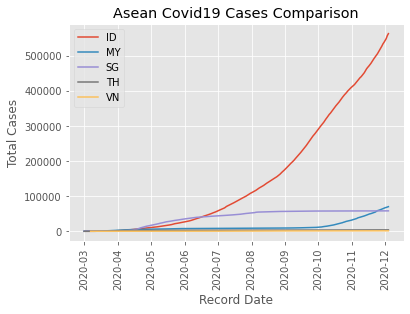

In [ ]:
import matplotlib.pyplot as plt
plt.clf()
countries = ['ID','MY','SG','TH','VN']
for country in countries:
  #country_data = df_covid_timeline_denormalized['country'] == country
  x = df_covid_timeline_denormalized[df_covid_timeline_denormalized['country'] == country]['last_update'] #df[condition][columns]
  y = df_covid_timeline_denormalized[df_covid_timeline_denormalized['country'] == country]['cases']
  plt.plot(x, y, label = country)

plt.legend()
plt.xticks(rotation=90)
plt.xlabel('Record Date')
plt.ylabel('Total Cases')
plt.title('Asean Covid19 Cases Comparison')
plt.show()